In [10]:
import rasterio     # import the main rasterio function
from rasterio.plot import show, show_hist # some specific rasterio functions we'll need

import matplotlib   # matplotlib is the primary python plotting and viz library
import matplotlib.pyplot as plt

# this bit of magic allows matplotlib to plot inline ina  jupyter notebook
%matplotlib inline  
import folium       # folium is an interactive mapping library

# Import the numpy module
import numpy as np

In [12]:
# add all the file paths to a list
s2_bands = ["D:\sentinel_sat\S2A_MSIL2A_20220110T041141_N0301_R047_T46QHE_20220110T062549.SAFE\GRANULE\L2A_T46QHE_A034221_20220110T042107\IMG_DATA\R10m\T46QHE_20220110T041141_B04_10m.jp2", 
            "D:\sentinel_sat\S2A_MSIL2A_20220110T041141_N0301_R047_T46QHE_20220110T062549.SAFE\GRANULE\L2A_T46QHE_A034221_20220110T042107\IMG_DATA\R10m\T46QHE_20220110T041141_B08_10m.jp2"]
        
# open these files and add all bands to an array
arrs = []
for band in s2_bands:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))

# convert the list to a numpy array
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
# let's check the shape of this array
sentinel_img.shape

(2, 10980, 10980)

# We'll clip this image slightly just in case of memory constraints on potential user's computers and for faster visualization.

In [13]:
clipped_img = sentinel_img[:, 0:750:, 0:1500]
clipped_img.shape

(2, 750, 1500)

# Let's take a look at the image:
Here we're going to use the rasterio show function which is a wrapper on matplotlib and allows us to plot a raster easily. We also are going to subset the clipped_img to just look at the first three bands so it will be an RGB image.

In [14]:
show(clipped_img[[2,1,0], :, :])

IndexError: index 2 is out of bounds for axis 0 with size 2

# Now let's plot a histogram of pixel values to check what is going on with the different bands:

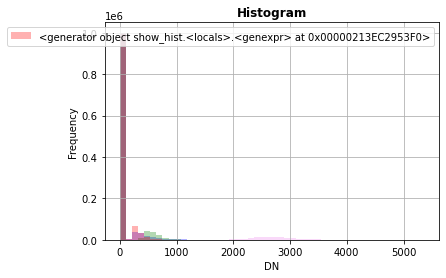

In [5]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

In [6]:
clipped_img[:,0,0]

array([ 537,  779, 1002, 2591], dtype=uint16)

In [7]:
# just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = clipped_img[2] # Eighth band
bandRed = clipped_img[1] # Fourth band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float)) / (bandNIR.astype(float)+bandRed.astype(float))

In [8]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: nan
Mean NDVI: nan
Median NDVI: nan
Min NDVI: nan


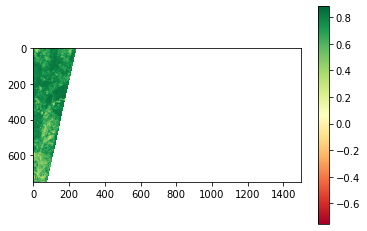

In [9]:
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()